## Data Description 

**ID:** This is a unique identifier for each individual and has no predictive value for loan default.

**CURRENCY:** This represents the currency in which the loan was issued.

**GENDER:** This represents the gender of each client and not likely to have a direct impact on loan default.

**MARITAL_STATUS:** Marital status could affect loan default rates, as it might influence financial stability and obligations.

**EMPLOYMENT_STATUS:** Employment status is an important feature, as unemployed individuals might have a higher likelihood of defaulting on loans.

**CREDIT_SCORE:** Credit score is a strong predictor of loan default since it reflects a person's creditworthiness.

**SCORE_GRADE:** This might be related to the credit score and can indicate the overall risk level associated with the loan applicant.

**NO_DEFAULT_LOAN:** If this column refers to the number of loans the individual has defaulted on in the past, it could be a key indicator.

**RISK_GRADE:** A risk grade is likely a predefined classification that could give insights into the risk of default.

**PRODUCT:** The type of loan or product might have different default rates (e.g., mortgage vs personal loan).

**CURRENCY:** Currency might be relevant if you're working in a multi-currency environment or if certain currencies are more prone to economic instability.

**NET_INCOME:** Higher net income may reduce the likelihood of loan default, as it reflects financial capacity.

**PRINCIPAL_DISBURSED:** The amount of the loan could impact the likelihood of default — higher loans could be more risky.

**EMI:** Equated Monthly Installments (EMI) are critical in determining whether someone is able to afford their loan payments.

**OD_AMOUNT:** Overdraft amount (if applicable) could provide insights into an individual’s financial instability.

**OD_DAYS:** The number of days an individual has been overdrawn or overdue could indicate potential risk of default

**LOAN_STATUS:** This column already indicated the outcome of the loan. It could as well be directly used as the target variable.


In [569]:
#Import libraries
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [570]:
# load the data 
df =pd.read_csv("../Data/Final_dataset_Final.csv", low_memory=False)


In [571]:
# inspect the first fews rows 
df.head()

,ID,GENDER,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,CURRENCY,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,LOAN_STATUS
0,104465,MALE,NaN,NaN,NaN,480.0,JJ,1.0,B20,Premium Finance - Consumer,KES,0.0,"235,203.00","40,637.03",2995,LOSS,"45,011.10",EXPIRED
1,138046,MALE,55.0,NaN,NaN,537.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.0,"215,000.00","7,186.79",2582,LOSS,"115,674.06",EXPIRED
2,173501,MALE,NaN,NaN,NaN,545.0,JJ,1.0,B20,Consumer Unsecured Loan,KES,0.0,"155,000.00","4,258.42",2667,LOSS,"65,541.89",EXPIRED
3,141836,MALE,NaN,NaN,NaN,626.0,HH,3.0,B20,Consumer Unsecured Loan,KES,0.0,"335,000.00","7,158.92",2810,LOSS,"297,407.57",EXPIRED
4,65973,MALE,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,KES,0.0,"105,000.00","2,136.29",2879,LOSS,"117,969.24",EXPIRED


In [572]:
# check the number of columns and rows 
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns before cleaning')

there are 115893 rows and 18 columns before cleaning


In [573]:
# summary statistics 
df.describe()

,ID,AGE,CREDIT_SCORE,NO_DEFAULT_LOAN,NET INCOME,OD_DAYS
count,115893.000000,98437.000000,94881.000000,94571.000000,1.158930e+05,115893.000000
mean,125044.802154,39.544368,651.381130,1.390775,1.443014e+06,236.655398
std,43349.212378,13.383122,80.207887,1.958711,4.520676e+06,664.039323
min,50001.000000,-1799.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,87557.000000,33.000000,597.000000,0.000000,0.000000e+00,0.000000
50%,124829.000000,38.000000,647.000000,1.000000,2.055950e+05,0.000000
75%,162685.000000,45.000000,710.000000,2.000000,1.173422e+06,21.000000
max,199999.000000,122.000000,830.000000,84.000000,4.096672e+08,8176.000000


In [574]:
# Data types and missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115893 entries, 0 to 115892
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         115893 non-null  int64  
 1   GENDER                     100117 non-null  object 
 2   AGE                        98437 non-null   float64
 3   MARITAL_STATUS             70425 non-null   object 
 4   EMPLOYMENT_STATUS          84133 non-null   object 
 5   CREDIT_SCORE               94881 non-null   float64
 6   SCORE_GRADE                94571 non-null   object 
 7   NO_DEFAULT_LOAN            94571 non-null   float64
 8   RISK_GRADE                 115893 non-null  object 
 9   PRODUCT                    115892 non-null  object 
 10  CURRENCY                   115893 non-null  object 
 11  NET INCOME                 115893 non-null  float64
 12  PRINCIPAL_DISBURSED        115893 non-null  object 
 13  EMI                        11

# Data Cleaning

### Null/NaN values 

In [575]:
# check for null values 
df.isna().sum()

ID                               0
GENDER                       15776
AGE                          17456
MARITAL_STATUS               45468
EMPLOYMENT_STATUS            31760
CREDIT_SCORE                 21012
SCORE_GRADE                  21322
NO_DEFAULT_LOAN              21322
RISK_GRADE                       0
PRODUCT                          1
CURRENCY                         0
NET INCOME                       0
PRINCIPAL_DISBURSED              0
EMI                              0
OD_DAYS                          0
PRUDENTIAL_CLASSIFICATION        0
OD_AMOUNT                        0
LOAN_STATUS                      0
dtype: int64

GENDER, AGE, MARITAL STATUS, EMPLOYMENT STATUS, CREDIT SCORE, SCORE GRADE, Number of loans defaulted and products have missing/NaN values. 

Dropped NAN for the CREDIT_SCORE,GENDER, AGE, EMPLOYMENT STATUS and SCORE GRADE as filling them would have misrepresented the data.

In [576]:
# drop null/missing values 
df.dropna(subset=["CREDIT_SCORE", "SCORE_GRADE", "GENDER","AGE","EMPLOYMENT_STATUS"], inplace=True)

For MARITAL STATUS we fill NAN with "OTHER" to represent cases where the marital status is either unknown, unspecified, or falls outside the predefined categories. This ensures consistency in the dataset and helps handle missing data appropriately for analysis purposes.

In [577]:
df["MARITAL_STATUS"] = df["MARITAL_STATUS"].fillna("OTHER")

In [578]:
df["MARITAL_STATUS"].isna().sum()

0

### Remove special characters and white spaces 


Some features like EMI, OD-AMOUNT, and PRINCIPAL-DISBURSED ought to be numerics however they have mixed data types and are categorized as objects. They also have special characters and must be removed and converted to floats. 

In [579]:
# slice the columns 
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]]

,EMI,OD_AMOUNT,PRINCIPAL_DISBURSED
4,"2,136.29","117,969.24","105,000.00"
9,"40,346.25",0,"5,189,721.55"
14,"14,996.64","857,627.23","680,000.00"
18,"61,804.69",0,"2,489,731.41"
21,"115,661.85","3,725,529.80","4,772,722.00"
...,...,...,...
115888,"34,398.05",0,"100,000.00"
115889,"21,088.53",0,"20,746.00"
115890,"12,909.69",0,"12,700.00"
115891,"13,214.64",0,"13,000.00"


Use lambda function to convert the columns to strings, remove commas, and then convert them back to floats.

In [580]:
# instantiate lambda function
lambda_x = lambda x: x.astype(str).str.replace(",", "").astype(float)
# apply the function on the sliced columns 
df[["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]] = df[["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]].apply(lambda_x)

In [581]:
# check the resulting columns 
df.loc[:, ["EMI", "OD_AMOUNT", "PRINCIPAL_DISBURSED"]].dtypes

EMI                    float64
OD_AMOUNT              float64
PRINCIPAL_DISBURSED    float64
dtype: object

In [582]:
# Inpect the data types and missing values once again 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79271 entries, 4 to 115892
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         79271 non-null  int64  
 1   GENDER                     79271 non-null  object 
 2   AGE                        79271 non-null  float64
 3   MARITAL_STATUS             79271 non-null  object 
 4   EMPLOYMENT_STATUS          79271 non-null  object 
 5   CREDIT_SCORE               79271 non-null  float64
 6   SCORE_GRADE                79271 non-null  object 
 7   NO_DEFAULT_LOAN            79271 non-null  float64
 8   RISK_GRADE                 79271 non-null  object 
 9   PRODUCT                    79271 non-null  object 
 10  CURRENCY                   79271 non-null  object 
 11  NET INCOME                 79271 non-null  float64
 12  PRINCIPAL_DISBURSED        79271 non-null  float64
 13  EMI                        79271 non-null  float64

In [583]:
print("Total rows after cleaning NAN:", df.shape[0])

Total rows after cleaning NAN: 79271


The dataset is now adjusted and cleaned accordingly 

# Target 

Since we do not have the target, we will engineer using prudential classification feature. Our target will be labled DEFAULT STATUS 

In [584]:
# check unique values and counts in prudential classification 
df["PRUDENTIAL_CLASSIFICATION"].value_counts()

PRUDENTIAL_CLASSIFICATION
NORMAL         60963
LOSS            9700
DOUBTFUL        3308
WATCH           3042
SUBSTANDARD     2258
Name: count, dtype: int64

There are 5 distinct classes in prudential classification. These classes will be the basis for engineering the target variable. Use a lmbda function to generate the target using the combination of the classes. 

In [585]:
# instantiate the function
lambdax = lambda x: 'DEFAULT' if x in ['SUBSTANDARD', 'DOUBTFUL', 'LOSS'] else 'NON-DEFAULT'

# use the lambda function to engineer target variable 
df['DEFAULT_STATUS'] = df['PRUDENTIAL_CLASSIFICATION'].apply(lambdax)

In [586]:
# check the target if it has been intergrated 
df["DEFAULT_STATUS"].value_counts()

DEFAULT_STATUS
NON-DEFAULT    64005
DEFAULT        15266
Name: count, dtype: int64

## Feature Engineering

### Features to consider for dropping 
Some features have little or no relationship with our target and hence they were removed. ID, CURRENCY, GENDER AND LOAN STATUS were removed. 

**ID:** This is a unique identifier for each individual and has no predictive value for loan default.

**CURRENCY:** This was not useful since we are working with loans of single currency.

**GENDER:** Gender was not likely to have a direct impact on loan default rates and was considered irrelevant.

**LOAN_STATUS:** This column already indicated the outcome of the loan. It could as well be directly used as the target variable.

In [587]:
# drop the above columns 
df.drop(columns=["ID", "CURRENCY", "GENDER", "LOAN_STATUS"], inplace=True)

In [588]:
# check columns remaining 
df.columns

Index(['AGE', 'MARITAL_STATUS', 'EMPLOYMENT_STATUS', 'CREDIT_SCORE',
       'SCORE_GRADE', 'NO_DEFAULT_LOAN', 'RISK_GRADE', 'PRODUCT', 'NET INCOME',
       'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS', 'PRUDENTIAL_CLASSIFICATION',
       'OD_AMOUNT', 'DEFAULT_STATUS'],
      dtype='object')

In [589]:
# prent the number of rows and columns after cleaning 
print(f' There are {df.shape[0]} rows and {df.shape[1]} columns after cleaning')

 There are 79271 rows and 15 columns after cleaning


In [590]:
# save the cleaned dataset back to local storage 
#df.to_csv("../Data/Cleaned_dataset.csv", index=False)

# Exploratory Data Analysis (EDA)

EDA helps us to understand the data better, find patterns, identify anomalies, check assumptions, and uncover relationships. 

In [591]:
# load the cleaned dataset
df_loan = pd.read_csv("../Data/Cleaned_dataset.csv")

In [592]:
# First few rows
df_loan.head()

,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,DEFAULT_STATUS
0,63.0,MARRIED,EMPLOYED,524.0,JJ,2.0,B20,Consumer Unsecured Loan,0.00,105000.00,2136.29,2879,LOSS,117969.24,DEFAULT
1,43.0,MARRIED,OTHER,713.0,CC,0.0,A5,Mortgage Loan,6082350.54,5189721.55,40346.25,0,NORMAL,0.00,NON-DEFAULT
2,45.0,MARRIED,EMPLOYED,610.0,II,1.0,B20,Consumer Unsecured Loan,0.00,680000.00,14996.64,3763,LOSS,857627.23,DEFAULT
3,50.0,MARRIED,SELF-EMPLOYED,625.0,HH,1.0,A5,Motor Vehicle Loan,1916500.00,2489731.41,61804.69,0,NORMAL,0.00,NON-DEFAULT
4,35.0,MARRIED,EMPLOYED,657.0,GG,3.0,B11,Motor Vehicle Loan,0.00,4772722.00,115661.85,754,LOSS,3725529.80,DEFAULT


In [593]:
# Last few rows
df_loan.tail()

,AGE,MARITAL_STATUS,EMPLOYMENT_STATUS,CREDIT_SCORE,SCORE_GRADE,NO_DEFAULT_LOAN,RISK_GRADE,PRODUCT,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,PRUDENTIAL_CLASSIFICATION,OD_AMOUNT,DEFAULT_STATUS
79266,38.0,MARRIED,SELF-EMPLOYED,624.0,HH,4.0,A5,Digital Personal Loan,3090724.25,100000.0,34398.05,0,NORMAL,0.0,NON-DEFAULT
79267,43.0,MARRIED,EMPLOYED,579.0,JJ,1.0,A5,Mobile Loan,819280.00,20746.0,21088.53,0,NORMAL,0.0,NON-DEFAULT
79268,27.0,SINGLE,EMPLOYED,636.0,HH,0.0,A5,Mobile Loan,529145.61,12700.0,12909.69,0,NORMAL,0.0,NON-DEFAULT
79269,42.0,OTHER,OTHER,667.0,FF,0.0,A5,Mobile Loan,4129210.00,13000.0,13214.64,0,NORMAL,0.0,NON-DEFAULT
79270,26.0,SINGLE,SELF-EMPLOYED,577.0,JJ,3.0,A5,Mobile Loan,228155.78,2876.0,2923.48,0,NORMAL,0.0,NON-DEFAULT


In [594]:
# Data types and non-null counts
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79271 entries, 0 to 79270
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AGE                        79271 non-null  float64
 1   MARITAL_STATUS             79271 non-null  object 
 2   EMPLOYMENT_STATUS          79271 non-null  object 
 3   CREDIT_SCORE               79271 non-null  float64
 4   SCORE_GRADE                79271 non-null  object 
 5   NO_DEFAULT_LOAN            79271 non-null  float64
 6   RISK_GRADE                 79271 non-null  object 
 7   PRODUCT                    79271 non-null  object 
 8   NET INCOME                 79271 non-null  float64
 9   PRINCIPAL_DISBURSED        79271 non-null  float64
 10  EMI                        79271 non-null  float64
 11  OD_DAYS                    79271 non-null  int64  
 12  PRUDENTIAL_CLASSIFICATION  79271 non-null  object 
 13  OD_AMOUNT                  79271 non-null  flo

In [595]:
# Check missing values
df.isnull().sum()

AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
DEFAULT_STATUS               0
dtype: int64

In [596]:
# examine summary statistics such as mean, median, standard deviation, min, and max values for numerical columns.
df_loan.describe()

,AGE,CREDIT_SCORE,NO_DEFAULT_LOAN,NET INCOME,PRINCIPAL_DISBURSED,EMI,OD_DAYS,OD_AMOUNT
count,79271.000000,79271.000000,79271.000000,7.927100e+04,7.927100e+04,7.927100e+04,79271.000000,7.927100e+04
mean,38.589396,648.149210,1.395807,1.626253e+06,7.369712e+05,3.349274e+04,179.934137,8.124814e+04
std,14.017264,80.520443,1.951161,4.676518e+06,1.901389e+06,1.555300e+05,530.773909,4.860208e+05
min,-1799.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,32.000000,595.000000,0.000000,0.000000e+00,8.000000e+03,5.577775e+03,0.000000,0.000000e+00
50%,37.000000,645.000000,1.000000,4.050300e+05,5.300000e+04,1.696420e+04,0.000000,0.000000e+00
75%,44.000000,706.000000,2.000000,1.433186e+06,6.247175e+05,4.275432e+04,20.000000,5.872070e+03
max,94.000000,830.000000,84.000000,4.096672e+08,1.276698e+08,2.603850e+07,7358.000000,3.819982e+07


The minimum value of age is a negative pointing to a possibility of outliers or errors during capture of the data 

### Correlation 
To check the relationships among the features 

In [597]:
# define numerical columns 
numerical_cols = df_loan.select_dtypes(include=['number']).columns
numerical_cols

Index(['AGE', 'CREDIT_SCORE', 'NO_DEFAULT_LOAN', 'NET INCOME',
       'PRINCIPAL_DISBURSED', 'EMI', 'OD_DAYS', 'OD_AMOUNT'],
      dtype='object')

In [598]:
# instantiate correlation for numerical features 
correlation = df_loan[numerical_cols].corr()

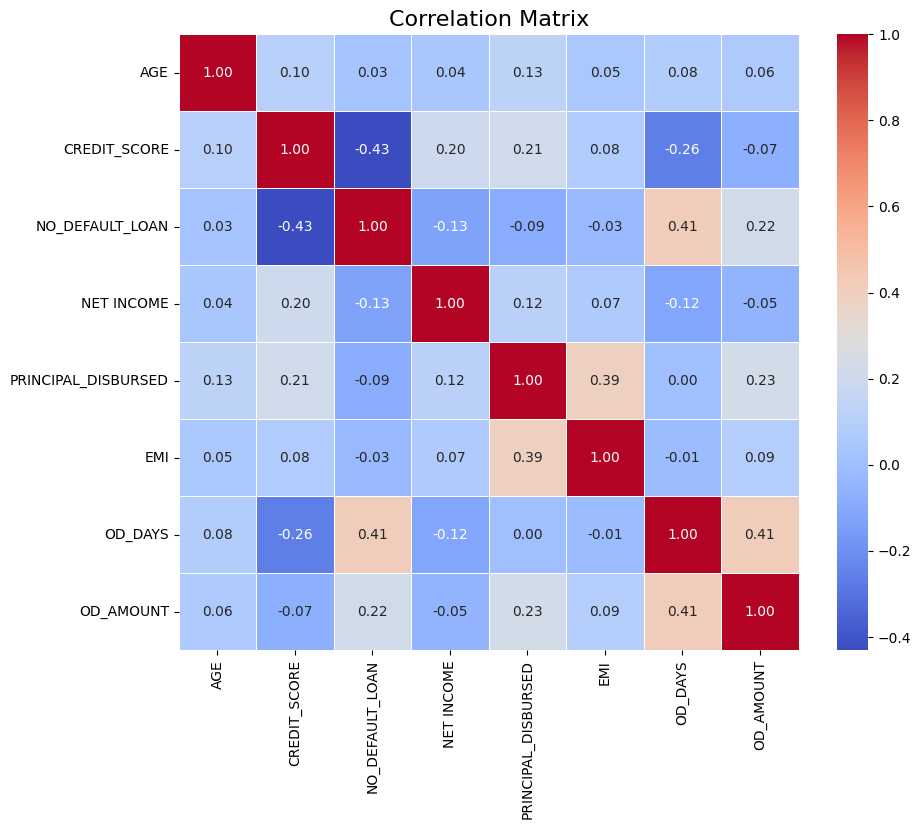

In [599]:
# plot a correlation matrix to visualize correlations 
plt.figure(figsize=(10,8))
sns.heatmap(correlation, linewidths=0.5, fmt='.2f', cmap="coolwarm", annot=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

#### Observation 
The values in the correlation matrix represent the strength and direction of relationships between features. A value close to 1 indicates a strong positive correlation, meaning the two features tend to increase together. Conversely, a value near -1 signifies a strong negative correlation, where one feature increases as the other decreases.

Values close to suggest little to no correlation, indicating that the features are largely independent. Moderate correlations are observed around 0.5 (positive) or -0.5 (negative), implying a moderate linear relationship.

From the matrix, we can observe that the features in our dataset exhibit minimal correlation, suggesting that they are relatively independent of one another. 

### Data Distribution 
To analyze the spread of values in the numerical columns, we examine their distribution. This helps identify patterns, potential outliers, and skewness in the dataset. Visualizing these distributions provides insights into the underlying data structure and informs preprocessing decisions.

#### Histogram 

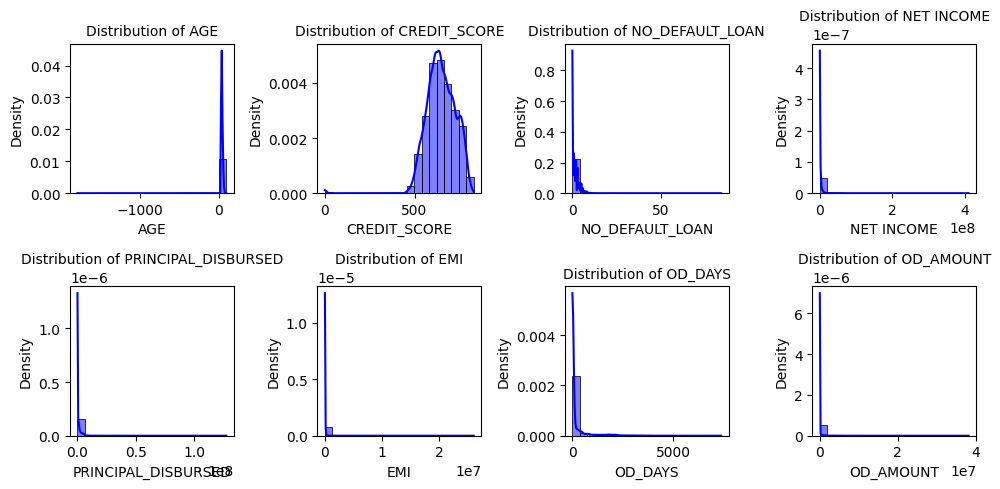

In [600]:
# plot the histogram to show the distribution in numeric columns 
plt.figure(figsize=(10,5))
for i, col in enumerate (df_loan[numerical_cols].columns):
  plt.subplot(2, 4, i+1) # create a subplot of 2 rows and 3 columns
  sns.histplot(df_loan[col], kde=True, color='blue', stat='density', bins =20)
  plt.title(f'Distribution of {col}', fontsize= 10)
plt.tight_layout() # Adjust subplots to fit nicely
plt.show()

#### Observation 
The histogram above illustrates the distribution of data points across numerical columns. We observe the presence of outliers in all numerical features, which may impact analysis. Additionally, several distributions appear skewed, with a majority of values concentrated toward the lower or upper ends of the range. This skewness suggests potential data transformations or scaling may be necessary for improved model performance and interpretation.

### Outliers 

Outliers are data points that deviate significantly from the rest of the dataset. Our goal is to identify and visualize these outliers to understand their impact on the data distribution.

In [601]:
# create an empty dictionary that will hold the columns and the number of outliers 
outlier_counts = {}
# create a for loop statement that loops through the numerical columns to identify outliers 
for col in numerical_cols:
    Q1 = df_loan[col].quantile(0.25)  # 25th percentile
    Q3 = df_loan[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df_loan[(df_loan[col] < lower_bound) | (df_loan[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    outlier_counts_series = pd.Series(outlier_counts)

print("Outliers in each feature using IQR method:\n")
for col, count in outlier_counts_series.items():
    print(f"{col}: {count}")


Outliers in each feature using IQR method:

AGE: 1297
CREDIT_SCORE: 182
NO_DEFAULT_LOAN: 3362
NET INCOME: 8854
PRINCIPAL_DISBURSED: 11107
EMI: 4315
OD_DAYS: 16998
OD_AMOUNT: 15126


AGE (1297 outliers): There may be individuals with exceptionally low or high ages compared to the general distribution. This could be due to data entry errors or rare cases.

CREDIT_SCORE (182 outliers): Extreme credit scores (either very low or very high) could indicate financial instability or exceptional creditworthiness.

NO_DEFAULT_LOAN (3362 outliers): A large number of outliers suggests that some individuals have taken an unusually high or low number of loans compared to the majority.

NET INCOME (8854 outliers): The presence of many outliers in income data indicates a highly skewed distribution, with some individuals earning significantly more or less than the average.

PRINCIPAL_DISBURSED (11107 outliers): The loan amounts disbursed have extreme values, possibly due to high-value loans taken by a few individuals.

EMI (4315 outliers): There are borrowers paying either very high or very low Equated Monthly Installments (EMI), possibly reflecting varying loan tenures or interest rates.

OD_DAYS (16998 outliers): The number of overdue days has a massive number of outliers, suggesting that while most borrowers repay on time, some have exceptionally long delays.

OD_AMOUNT (15126 outliers): Similar to OD_DAYS, the overdue amount has a significant number of extreme values, indicating a few borrowers with very high outstanding debts.

We will also use box plots to visually analyze the numerical columns, allowing us to clearly observe the distribution and presence of outliers

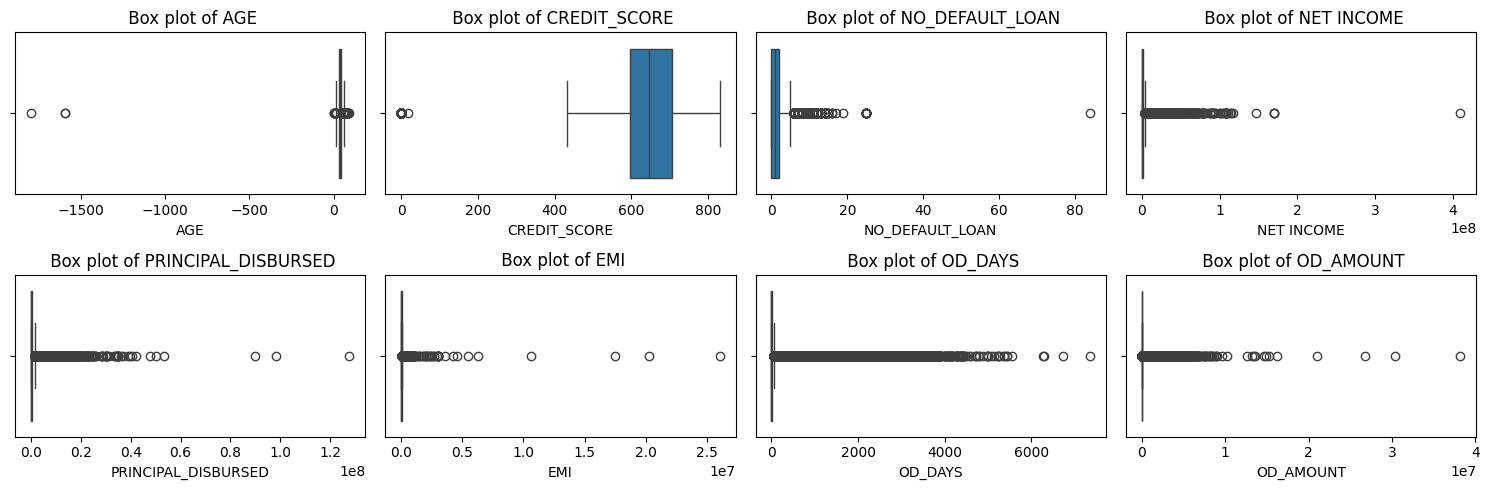

In [602]:
# visualize using boxplot

fig, axes = plt.subplots(2,4, figsize=(15,5))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_loan[col], ax = axes[i]) 
    axes[i].set_title(f" Box plot of {col}", fontsize=12)
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

### Handling Outliers 
We handle outliers in a manner that the resulting dataset will not have impact on the analysis and the model for our prediction. 

#### Cap Outliers

#### Age

In [603]:
# function to cap the age to between 20 and 60 years old 
def cap_age(df, column= "AGE", min_age = 18, max_age=60):
    df["AGE"] =df["AGE"].apply(lambda x: max(min(x, max_age), min_age))
    return df

In [604]:
# apply cap function and check the shape 
df_loan = cap_age(df_loan, column="AGE", min_age=18, max_age =60)
df_loan.shape

(79271, 15)

#### Credit Score 

In [605]:
# write a function to cap the credit score to between 450 and 900
def cap_credit_score(df, column="CREDIT_SCORE", min_score=450, max_score=900):
    df["CREDIT_SCORE"]= df["CREDIT_SCORE"].apply(lambda x: max(min(x, max_score), min_score))
    return df

In [606]:
# apply the function 
df_loan= cap_credit_score(df_loan, column ="CREDIT_SCORE", min_score=450, max_score=900)
df_loan.shape

(79271, 15)

#### Number of defaulted loans 
number of defaulted loans was capped at a max 0f 5 which is realistic in real world. Any number that can go to value like 80 is not realistic and could be an error which could affect analysis and the model. 

In [607]:
# cap the number of loans defaulted to between 0 and 5 
df_loan["NO_DEFAULT_LOAN"] = df_loan["NO_DEFAULT_LOAN"].apply(lambda x: min(x, 5))

#### Log Transformation
We will apply log transformation to the features Net Income, EMI, Principal Disbursed, OD_DAYS, and OD_Amount to reduce skewness and manage the high values in these variables.

In [608]:
# Apply log1p transformation to selected columns
columns_to_transform = ['NET INCOME', 'EMI', 'PRINCIPAL_DISBURSED', 'OD_AMOUNT', 'OD_DAYS']

# Apply log1p transformation to each column
df_loan[columns_to_transform] = df_loan[columns_to_transform].apply(np.log1p)

#### plot to check the results 

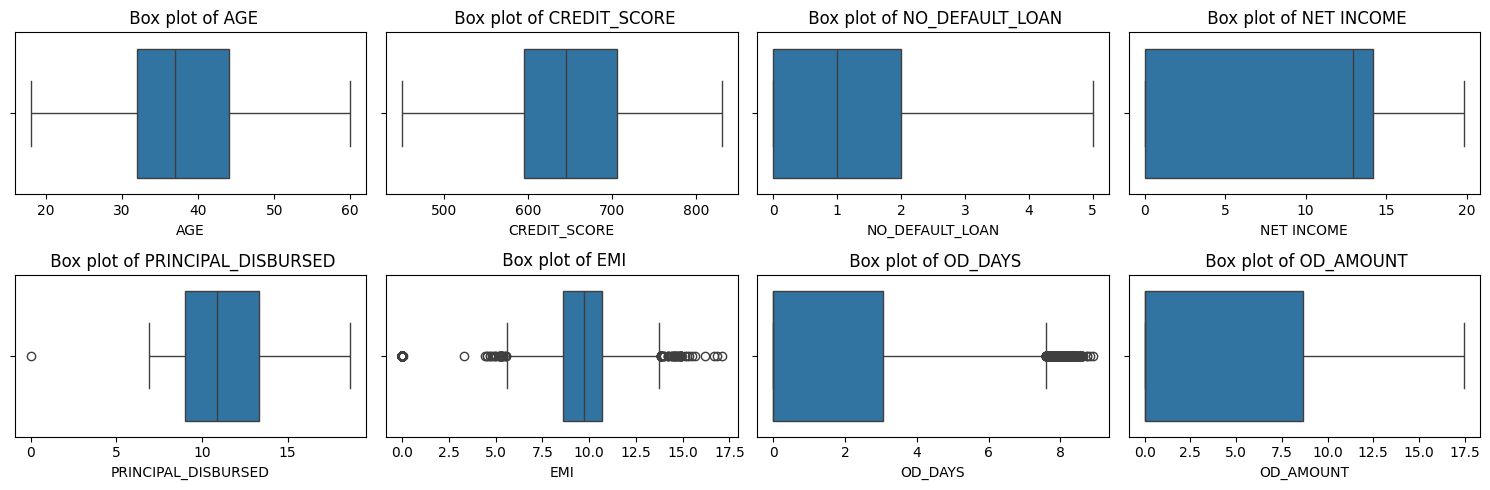

In [609]:
# visualize using boxplot

fig, axes = plt.subplots(2,4, figsize=(15,5))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_loan[col], ax = axes[i]) 
    axes[i].set_title(f" Box plot of {col}", fontsize=12)
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

Even after log transformation, principal disbursed and EMI still have outliers. Principal distursed has 1 outlier near 0 which in this case could simply be an error and should therefore be removed. EMI and OD_DAYS still shows the presence of outliers. 

In [610]:
# Remove the row where PRINCIPAL_DISBURSED is 0
df_loan = df_loan[df_loan['PRINCIPAL_DISBURSED'] > 0]

In [611]:
# cap the upper bound for EMI at 0.99 percentile 
upper_bound_emi = df_loan['EMI'].quantile(0.99)

# apply the lambda function on the emi feature to cap at 0.99 percentile 
df_loan['EMI'] = df_loan['EMI'].apply(lambda x: min(x, upper_bound_emi))

#Replace the lower bound outliers with the mean
df_loan['EMI'] = df_loan['EMI'].apply(lambda x: max(x, 6))

The outlier for OD_DAYS are only located on the upper bound. 

In [612]:
# For OD_DAYS cap the data poitnts at 7 
df_loan['OD_DAYS'] = df_loan['OD_DAYS'].apply(lambda x: min(x, 7))

Plot the final results to check for distribution using a box plot and a histogram 

Histogram 

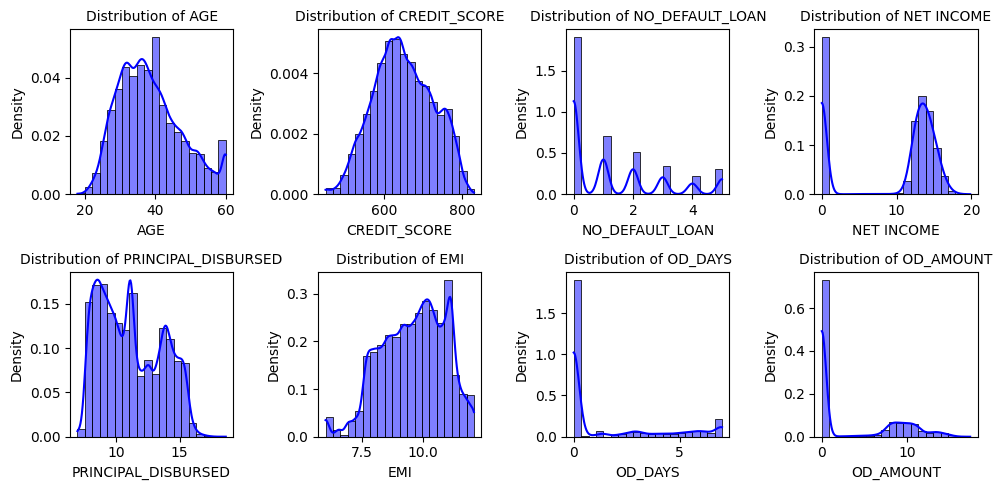

In [613]:
# plot the histogram to show the distribution in numeric columns 
plt.figure(figsize=(10,5))
for i, col in enumerate (df_loan[numerical_cols].columns):
  plt.subplot(2, 4, i+1) # create a subplot of 2 rows and 3 columns
  sns.histplot(df_loan[col], kde=True, color='blue', stat='density', bins =20)
  plt.title(f'Distribution of {col}', fontsize= 10)
plt.tight_layout() # Adjust subplots to fit nicely
plt.show()

Box Plot 

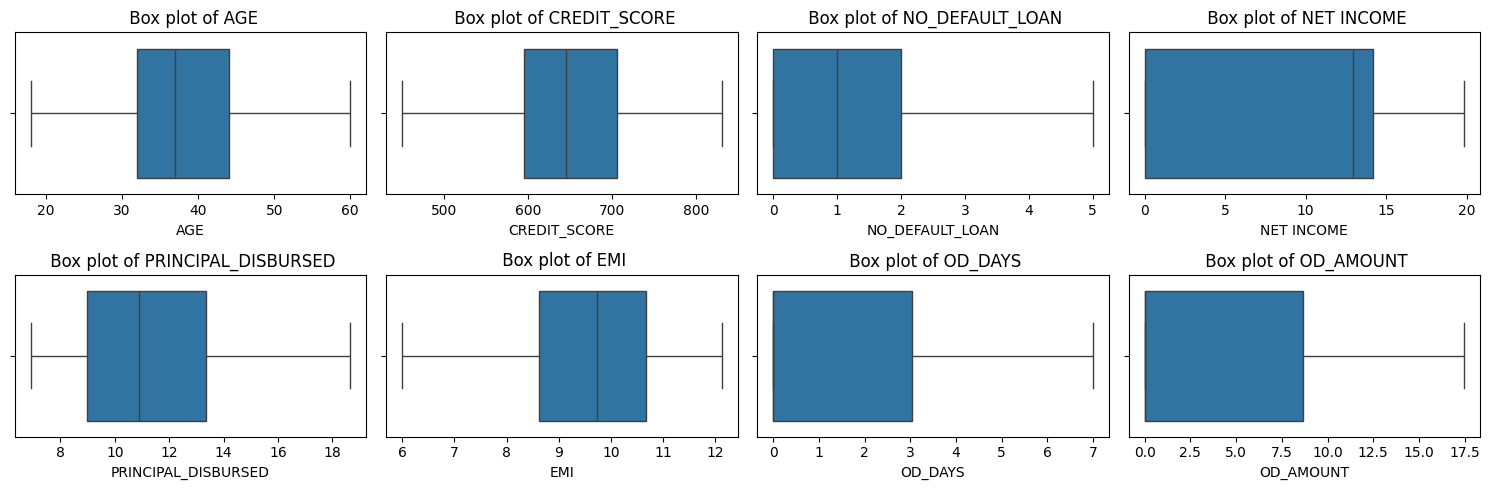

In [614]:
# visualize using boxplot

fig, axes = plt.subplots(2,4, figsize=(15,5))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df_loan[col], ax = axes[i]) 
    axes[i].set_title(f" Box plot of {col}", fontsize=12)
plt.subplots_adjust(top=0.9)
plt.tight_layout()
plt.show()

In [615]:
# check the number of outliers in each comment after handling outliers 

outlier_counts = {}
# create a for loop statement that loops through the numerical columns to identify outliers 
for col in numerical_cols:
    Q1 = df_loan[col].quantile(0.25)  # 25th percentile
    Q3 = df_loan[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = df_loan[(df_loan[col] < lower_bound) | (df_loan[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

    outlier_counts_series = pd.Series(outlier_counts)

print("Outliers in each feature using IQR method:\n")
for col, count in outlier_counts_series.items():
    print(f"{col}: {count}")

Outliers in each feature using IQR method:

AGE: 0
CREDIT_SCORE: 0
NO_DEFAULT_LOAN: 0
NET INCOME: 0
PRINCIPAL_DISBURSED: 0
EMI: 0
OD_DAYS: 0
OD_AMOUNT: 0


In [616]:
# check the shape 
print(f'{df_loan.shape[0]} rows and {df_loan.shape[1]} columns remained after handling outliers')

79270 rows and 15 columns remained after handling outliers


In [617]:
# Checking for missing values
df_loan.isnull().sum()

AGE                          0
MARITAL_STATUS               0
EMPLOYMENT_STATUS            0
CREDIT_SCORE                 0
SCORE_GRADE                  0
NO_DEFAULT_LOAN              0
RISK_GRADE                   0
PRODUCT                      0
NET INCOME                   0
PRINCIPAL_DISBURSED          0
EMI                          0
OD_DAYS                      0
PRUDENTIAL_CLASSIFICATION    0
OD_AMOUNT                    0
DEFAULT_STATUS               0
dtype: int64

### Default Status 

In [618]:
# value counts 
df_loan["DEFAULT_STATUS"].value_counts()

DEFAULT_STATUS
NON-DEFAULT    64004
DEFAULT        15266
Name: count, dtype: int64

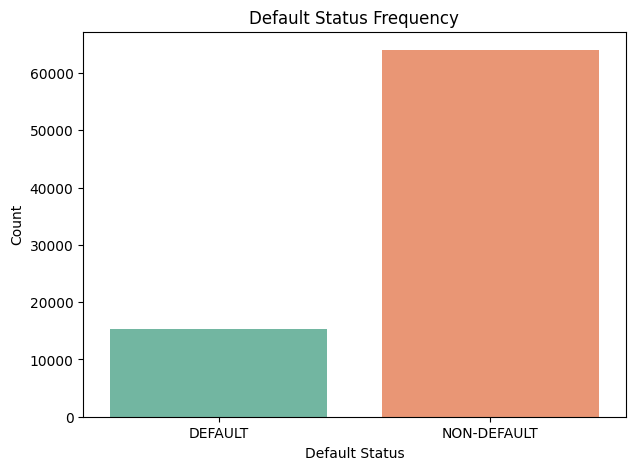

In [619]:
# visualize default status 
plt.figure(figsize=(7,5))
sns.countplot(x=df_loan["DEFAULT_STATUS"], palette=palette)
plt.title("Default Status Frequency")
plt.xlabel("Default Status")
plt.ylabel("Count")
plt.show()

### Observation 
Non-defaulters make up the majority of the dataset, significantly outnumbering defaulters. This suggests that a large portion of customers are able to repay their loans successfully, while a smaller proportion have defaulted.

### Segmentation of Customers' Ages 

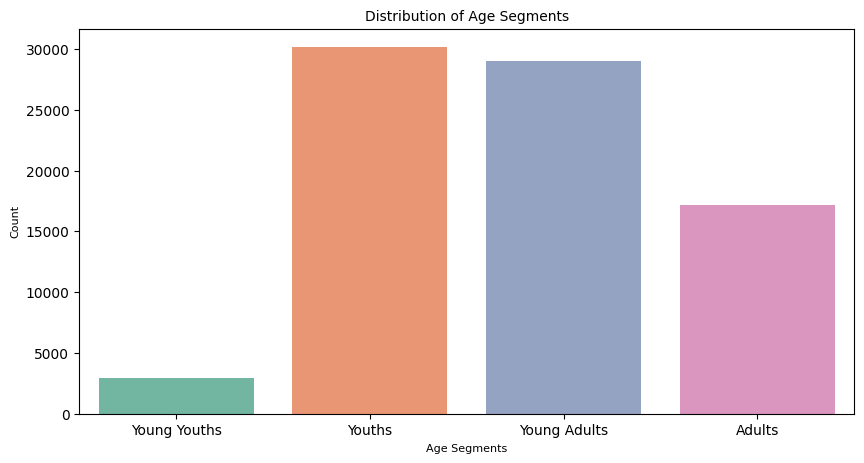

In [620]:
# Define the bins and labels 
ages = [18, 25, 35, 45, 60]
label_ages = ["Young Youths", "Youths", "Young Adults","Adults" ]

# Segment the age column for visualization 
age_segments = pd.cut(df_loan["AGE"], bins=ages, labels=label_ages, right =True)

# visualize age segments distribution 
plt.figure(figsize=(10, 5))
sns.countplot(x=age_segments, palette=palette)
plt.title("Distribution of Age Segments", fontsize=10)
plt.xlabel("Age Segments", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.show()


The majority of loan applicants fall within the 26-35 age range, followed by those in the 36-45 age group. The least represented group of loan applicants are the younger youths, aged 18-25. 

### Distribution of Marital Status

In [621]:
# check unique values and their counts 
df_loan["MARITAL_STATUS"].value_counts()

MARITAL_STATUS
MARRIED     40826
SINGLE      22467
OTHER       15587
WIDOWED       163
DIVORCED       99
ENGAGED        99
PARTNER        29
Name: count, dtype: int64

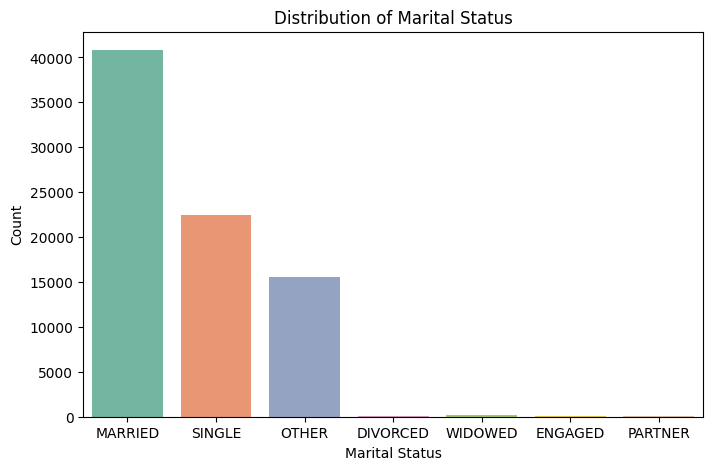

In [622]:
# visualize the distribution of maital status 
plt.figure(figsize=(8,5))
sns.countplot(x=df_loan["MARITAL_STATUS"], palette=palette)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

Married individuals make up the majority of the customer base, followed by single individuals as the second largest group.

### Correlation with Default Status 

In [623]:
# group marital status with the target to check on the default status of each category 
df_loan.groupby("MARITAL_STATUS")["DEFAULT_STATUS"].value_counts().sort_values(ascending=False)

MARITAL_STATUS  DEFAULT_STATUS
MARRIED         NON-DEFAULT       34469
SINGLE          NON-DEFAULT       18979
OTHER           NON-DEFAULT       10223
MARRIED         DEFAULT            6357
OTHER           DEFAULT            5364
SINGLE          DEFAULT            3488
WIDOWED         NON-DEFAULT         142
DIVORCED        NON-DEFAULT          84
ENGAGED         NON-DEFAULT          82
PARTNER         NON-DEFAULT          25
WIDOWED         DEFAULT              21
ENGAGED         DEFAULT              17
DIVORCED        DEFAULT              15
PARTNER         DEFAULT               4
Name: count, dtype: int64

<Figure size 800x500 with 0 Axes>

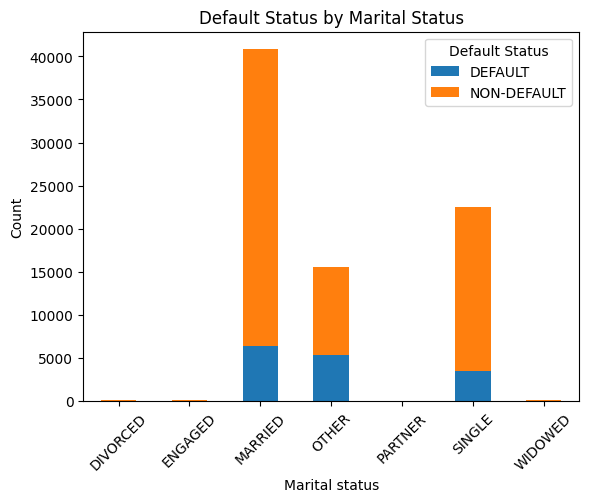

In [624]:
# visualize marital status with default status 
# define a cross tabuletion table 
mirital_default_count = pd.crosstab(df_loan["MARITAL_STATUS"], df_loan["DEFAULT_STATUS"])

plt.figure(figsize=(8,5))
mirital_default_count.plot(kind='bar', stacked=True)
plt.title ("Default Status by Marital Status")
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Default Status")
plt.show()

Married individuals dominate the dataset both in terms of non-defaults and defaults, while other groups like single, widowed, divorced, engaged, and partnered make up a much smaller proportion of customers, particularly in this context of defaults.

### Analysis of Credit Score 

In [625]:
# check the description
df_loan["CREDIT_SCORE"].describe()


count    79270.000000
mean       649.182162
std         74.888957
min        450.000000
25%        595.000000
50%        645.000000
75%        706.000000
max        830.000000
Name: CREDIT_SCORE, dtype: float64

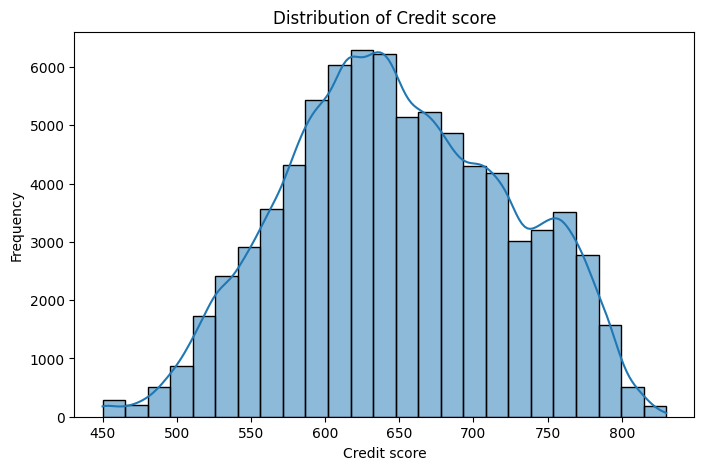

In [626]:
# visualize the distribution of the credit score 
plt.figure(figsize=(8,5))
sns.histplot(df_loan["CREDIT_SCORE"], kde=True, bins =25)
plt.title("Distribution of Credit score")
plt.xlabel("Credit score")
plt.ylabel("Frequency")
plt.show()

### Observation
The credit score follows a normal distribution, as observed from the histogram and KDE plot above. 

### Credit Score vs Default status 

#### Violin Plot

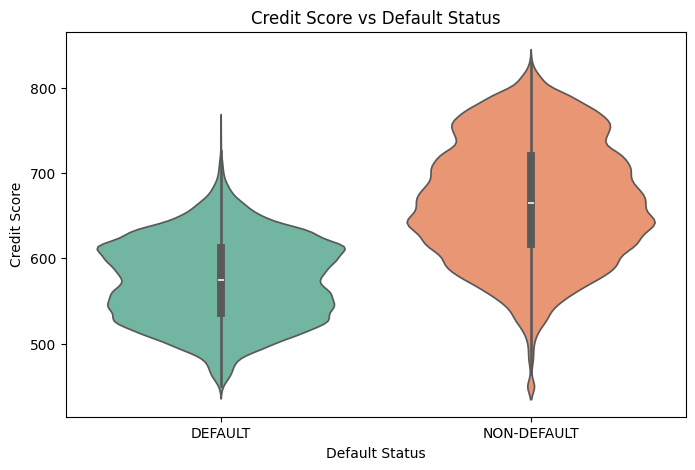

In [627]:
# violin plot 
plt.figure(figsize=(8,5))
sns.violinplot(x=df_loan["DEFAULT_STATUS"], y=df_loan["CREDIT_SCORE"], palette='Set2')
plt.title("Credit Score vs Default Status")
plt.xlabel("Default Status")
plt.ylabel("Credit Score")
plt.show()

### Observation 
From the observation of the violin plot above, it is clear that the majority of defaults occur among customers with lower credit score ratings.

### Net Income 

In [628]:
# summary statistics 
df_loan["NET INCOME"].describe()

count    79270.000000
mean         9.411749
std          6.504202
min          0.000000
25%          0.000000
50%         12.911739
75%         14.175419
max         19.830856
Name: NET INCOME, dtype: float64

#### Net Income by Default Status 

In [633]:
# group net income with the target to check on the distribution of net income by default status 
df_loan.groupby("NET INCOME")["DEFAULT_STATUS"].value_counts().sort_values(ascending=False)

NET INCOME  DEFAULT_STATUS
0.000000    DEFAULT           15266
            NON-DEFAULT        9854
12.787816   NON-DEFAULT         143
14.852503   NON-DEFAULT         133
15.958431   NON-DEFAULT          55
                              ...  
13.780598   NON-DEFAULT           1
13.780454   NON-DEFAULT           1
13.780440   NON-DEFAULT           1
12.601272   NON-DEFAULT           1
19.830856   NON-DEFAULT           1
Name: count, Length: 36551, dtype: int64

Customers with low income are likely to default as comapred to those with high net income.

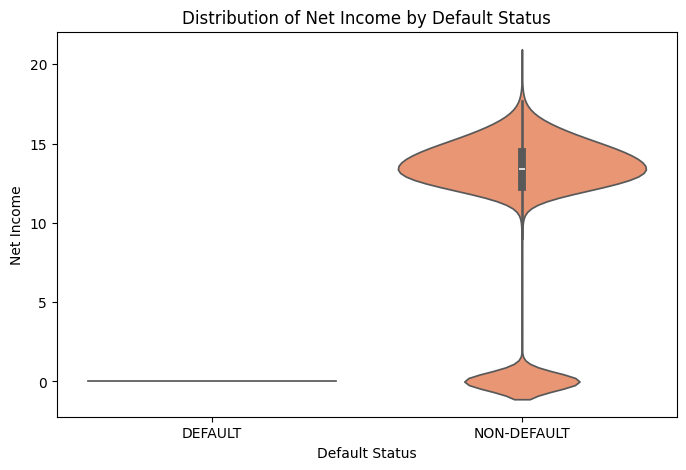

In [635]:
plt.figure(figsize=(8,5))
sns.violinplot(x=df_loan["DEFAULT_STATUS"], y=df_loan["NET INCOME"], palette='Set2')
plt.title("Distribution of Net Income by Default Status")
plt.xlabel("Default Status")
plt.ylabel("Net Income")
plt.show()

Low-income individuals are at a significantly higher risk of defaulting. High-income individuals are more likely to be non-defaulters.